In [1]:
# Import necessary libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random  # Add this import
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [4]:
# Define constants
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# Load data
image_data = []
for dr in os.listdir("\\leapGestRecog\\leapGestRecog"):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join("\\leapGestRecog\\leapGestRecog", dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

In [6]:
# Shuffle and split data
random.shuffle(image_data)
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

# Normalize data
input_data = np.array(input_data) / 255.0

# One-hot encode labels
label = np.array(label)
label = to_categorical(label, num_classes=10)

# Reshape input data
input_data = input_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.3, random_state=0)


In [7]:
# Build the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add max pooling layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

c:\Users\paray\OneDrive\Desktop\pyhtondownload\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - accuracy: 0.8936 - loss: 0.3984 - val_accuracy: 0.2618 - val_loss: 3.6293
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9988 - val_loss: 0.0108
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.9987 - loss: 0.0081 - val_accuracy: 0.7638 - val_loss: 0.6002
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 34s 76ms/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 0.9997 - val_loss: 0.0015
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 1.0000 - loss: 6.1600e-04 - val_accuracy: 0.9997 - val_loss: 8.7398e-04
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 1.0000 - loss: 3.7091e-04 - val_accuracy: 0.9998 - val_loss: 5.6255e-04


In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9999 - loss: 5.6172e-04
Test accuracy: 99.98%


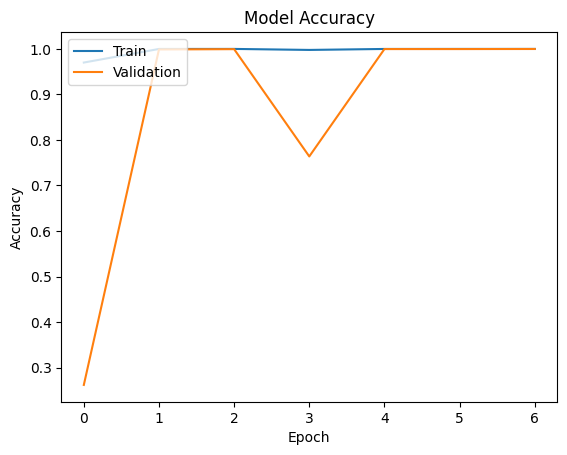

In [10]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()